# Modelo de Regresión Logística con Scikit-Learn

Este notebook implementa un modelo de **Regresión Logística** usando Python y Scikit-Learn, aplicado a un dataset de diabetes.

### Cargar el dataset
Usamos `pandas` para leer un archivo CSV con los datos de pacientes.

In [54]:
import pandas as pd
datos_diabetes = pd.read_csv("./data/diabetes.csv")

### Separar variables independientes (X) y la variable dependiente (y)
- `X`: todas las columnas excepto `Outcome`.
- `y`: la columna `Outcome`, que indica si el paciente tiene diabetes o no (1 o 0).

In [55]:
caracteristicas = datos_diabetes.drop("Outcome", axis=1)
resultado = datos_diabetes["Outcome"]

### Dividir los datos en entrenamiento y prueba
Usamos `train_test_split` para dividir el dataset en 80% entrenamiento y 20% prueba.

In [56]:
from sklearn.model_selection import train_test_split

carac_entrenamiento, carac_prueba, res_entrenamiento, res_prueba = train_test_split(
    caracteristicas, resultado, test_size=0.2, random_state=42)

### Crear y entrenar el modelo
Creamos una instancia de `LogisticRegression` y la entrenamos usando `X_train` e `y_train`.

In [57]:
from sklearn.linear_model import LogisticRegression

clasificador_diabetes = LogisticRegression(max_iter=1000)
clasificador_diabetes.fit(carac_entrenamiento, res_entrenamiento)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Hacer predicciones y evaluar el modelo
Usamos el conjunto de prueba para predecir y luego medimos la precisión del modelo.

In [58]:
from sklearn.metrics import accuracy_score

predicciones = clasificador_diabetes.predict(carac_prueba)
print("Precisión del modelo:", accuracy_score(res_prueba, predicciones))

Precisión del modelo: 0.7467532467532467


### Visualización de la frontera de decisión

Para visualizar la frontera de decisión, seleccionamos dos variables del dataset: Glucose y BMI.

In [59]:
import matplotlib.pyplot as plt
import numpy as np

X = datos_diabetes[['Glucose', 'BMI']]
Y = datos_diabetes['Outcome']

Reentrenamos el modelo de regresión logística usando solo estas dos variables para poder graficar la frontera de decisión en dos dimensiones.

In [60]:
carac_entren_vis, carac_prueba_vis, res_entren_vis, res_prueba_vis = train_test_split(
    X, Y, test_size=0.2, random_state=42)
modelo_visual = LogisticRegression()
modelo_visual.fit(carac_entren_vis, res_entren_vis)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Creamos una grilla de valores para Glucose y BMI, y predecimos la clase para cada punto de la grilla para dibujar la frontera de decisión.

In [61]:
glucosa_min, glucosa_max = X['Glucose'].min()-1, X['Glucose'].max()+1
bmi_min, bmi_max = X['BMI'].min()-1, X['BMI'].max()+1
rejilla_glucosa, rejilla_bmi = np.meshgrid(
    np.linspace(glucosa_min, glucosa_max, 100),
    np.linspace(bmi_min, bmi_max, 100)
)
zonas = modelo_visual.predict(np.c_[rejilla_glucosa.ravel(), rejilla_bmi.ravel()])
zonas = zonas.reshape(rejilla_glucosa.shape)

c:\Users\IPF-2025\Desktop\regresion_logistica\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Finalmente, graficamos la frontera de decisión junto con los puntos de los pacientes, coloreados según si tienen o no diabetes.

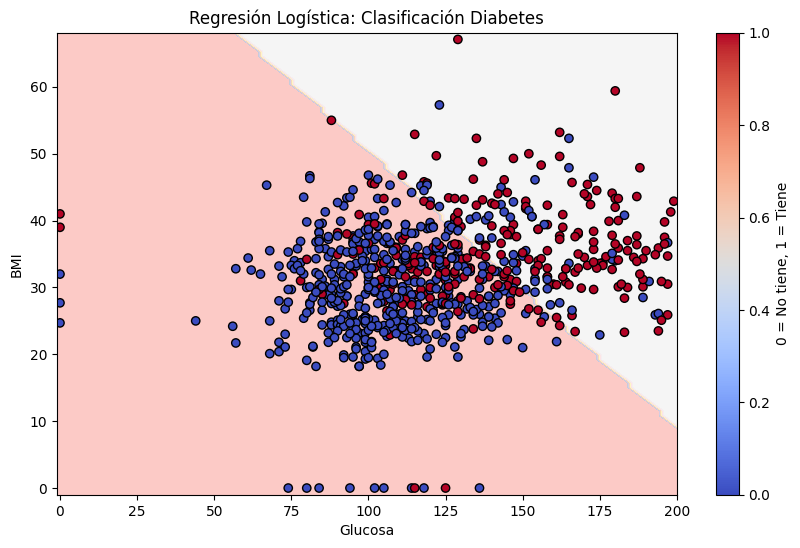

In [62]:
plt.figure(figsize=(10,6))
plt.contourf(rejilla_glucosa, rejilla_bmi, zonas, cmap=plt.cm.Pastel1, alpha=0.7)
plt.scatter(X['Glucose'], X['BMI'], c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Glucosa")
plt.ylabel("BMI")
plt.title("Regresión Logística: Clasificación Diabetes")
plt.colorbar(label="0 = No tiene, 1 = Tiene")
plt.show()